## `Exploratory Data Analysis (EDA) `
### `Lending Club Case Study`


In [306]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
import warnings
warnings.filterwarnings("ignore") 

### `Import the .csv file into a Pandas DataFrame`

In [311]:

loan_work = pd.read_csv(('D:\Technocolabs Internship\Task 2\Demystifying-Risk-of-Lending-Club-main\Demystifying-Risk-of-Lending-Club-main\lending_club_loans.csv'), encoding ="ISO-8859-1")
loan = loan_work.copy(deep=True)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,0.0933,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,0.0838,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `Drop Unnecessary Features`

In [314]:
print(loan.columns)
# Check for leading or trailing spaces in column names
loan.columns = loan.columns.str.strip()
print(loan.columns)
columns_to_drop = [
    'acc_now_delinq',
    'application_type',
    'chargeoff_within_12_mths',
    'collection_recovery_fee',
    'collections_12_mths_ex_med',
    'delinq_2yrs',
    'delinq_amnt',
    'desc',
    'id',
    'initial_list_status',
    'member_id',
    'mths_since_last_delinq',
    'mths_since_last_record',
    'policy_code',
    'pymnt_plan',
    'recoveries',
    'tax_liens',
    'title',
    'out_prncp',
    'total_pymnt',
    'total_rec_late_fee',
    'total_rec_prncp',
    'url'
]

missing_columns = [col for col in columns_to_drop if col not in loan.columns]
print(f"Missing columns: {missing_columns}")
existing_columns_to_drop = [col for col in columns_to_drop if col in loan.columns]
loan = loan.drop(existing_columns_to_drop, axis=1)


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103', 'Unnamed: 104',
       'Unnamed: 105', 'Unnamed: 106', 'Unnamed: 107', 'Unnamed: 108',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object', length=111)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'Unnamed: 101', 'Unnamed: 102', 'Unnamed: 103', 'Unnamed: 104',
       'Unnamed: 105', 'Unnamed: 106', 'Unnamed: 107', 'Unnamed: 108',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object', length=111)
Missing columns: []


### `Transform a Text Label into Numeric using Apply-Lambda Function`

In [316]:
# Create new column "Defaulted" with Value 1 if Loan Status is Charged Off, otherwise 0  

loan['defaulted'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [318]:
# Get a Statisctical picture on the Numerical Data

loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,defaulted
count,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42535.000000,42535.00000,42506.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42538.000000
mean,11089.722581,10821.585753,10139.830603,0.121650,322.623063,6.913656e+04,13.372683,713.052639,717.03543,1.081777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.132893
std,7410.938391,7146.914675,7131.686447,0.037079,208.927216,6.409635e+04,6.726567,36.188475,36.35456,1.529168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339463
min,500.000000,500.000000,0.000000,0.054200,15.670000,1.896000e+03,0.000000,610.000000,1.00000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
25%,5200.000000,5000.000000,4950.000000,0.096300,165.520000,4.000000e+04,8.200000,685.000000,689.00000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
50%,9700.000000,9600.000000,8500.000000,0.119900,277.690000,5.900000e+04,13.470000,710.000000,714.00000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
75%,15000.000000,15000.000000,14000.000000,0.147200,428.180000,8.250000e+04,18.680000,740.000000,744.00000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
max,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,825.000000,829.00000,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.000000


In [320]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_int',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'Unnamed: 54',
       'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78'

In [322]:
loan = loan.drop(['Unnamed: 54', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67',
       'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71',
       'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75',
       'Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79',
       'Unnamed: 80', 'Unnamed: 81', 'Unnamed: 84', 'Unnamed: 85',
       'Unnamed: 86', 'Unnamed: 87', 'Unnamed: 88', 'Unnamed: 89',
       'Unnamed: 90', 'Unnamed: 91', 'Unnamed: 92', 'Unnamed: 93',
       'Unnamed: 94', 'Unnamed: 95', 'Unnamed: 96', 'Unnamed: 97',
       'Unnamed: 98', 'Unnamed: 99', 'Unnamed: 100', 'Unnamed: 101',
       'Unnamed: 102', 'Unnamed: 103', 'Unnamed: 104', 'Unnamed: 105',
       'Unnamed: 106', 'Unnamed: 107', 'Unnamed: 108'], axis=1)

loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,defaulted
0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,...,5833.84,863.16,2015-01,171.62,NaN,2016-09,744.0,740,0,0
1,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,...,1008.71,435.17,2013-04,119.66,NaN,2016-09,499.0,0,0,1
2,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,NaN,10+ years,...,3005.67,605.67,2014-06,649.91,NaN,2016-09,719.0,715,0,0
3,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,2214.92,2015-01,357.48,NaN,2016-04,604.0,600,0,0
4,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,University Medical Group,1 year,...,3784.49,1055.27,2016-09,67.79,2016-10,2016-09,694.0,690,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,2525.0,2525.0,225.0,36 months,0.0933,80.69,B,B3,NaN,< 1 year,...,258.82,379.50,2010-06,82.03,2010-07,2007-05,714.0,710.0,NaN,0
42534,6500.0,6500.0,0.0,36 months,0.0838,204.84,A,A5,NaN,< 1 year,...,0.00,873.90,2010-06,205.32,2010-07,2007-08,724.0,720.0,NaN,0
42535,5000.0,5000.0,0.0,36 months,0.0775,156.11,A,A3,Homemaker,10+ years,...,0.00,619.76,2010-06,156.39,2010-07,2015-02,794.0,790.0,NaN,0
42536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [324]:
# Get a glimpse of the type of individual fields

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   funded_amnt           42535 non-null  float64
 2   funded_amnt_inv       42535 non-null  float64
 3   term                  42535 non-null  object 
 4   int_rate              42535 non-null  float64
 5   installment           42535 non-null  float64
 6   grade                 42535 non-null  object 
 7   sub_grade             42535 non-null  object 
 8   emp_title             39909 non-null  object 
 9   emp_length            41423 non-null  object 
 10  home_ownership        42535 non-null  object 
 11  annual_inc            42531 non-null  float64
 12  verification_status   42535 non-null  object 
 13  issue_d               42535 non-null  object 
 14  loan_status           42535 non-null  object 
 15  purpose            

## `Univariate Analysis - EDA`

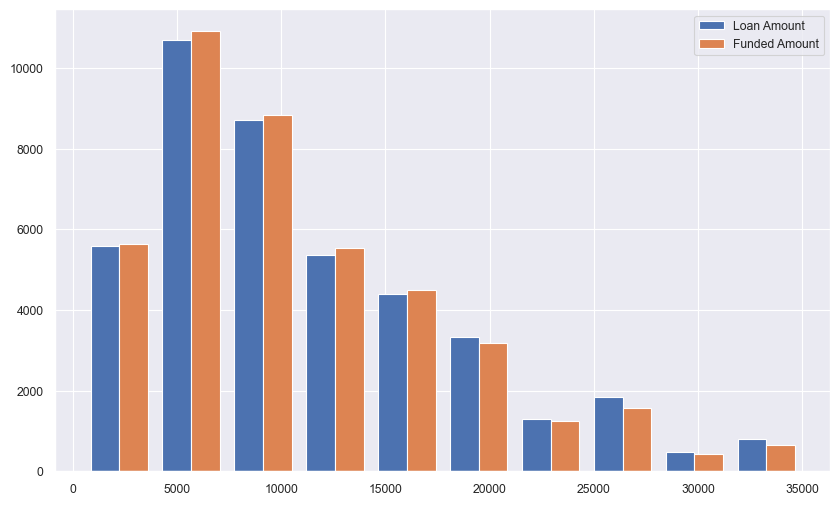

In [327]:
# Check distribution of Loan amounts and Funded Amounts

ax = plt.subplots(figsize=(10, 6))
plt.hist([loan.loan_amnt, loan.funded_amnt], label=['Loan Amount', 'Funded Amount'])
plt.legend()

<Axes: >

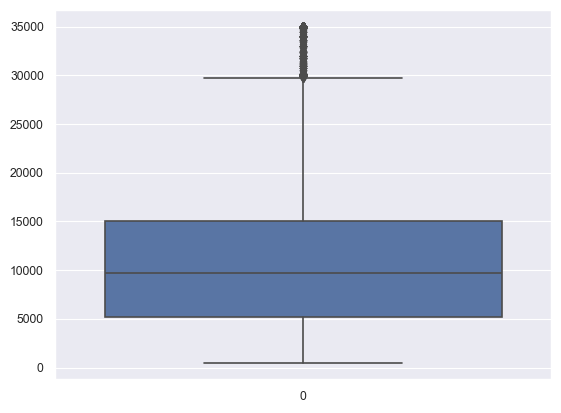

In [329]:
# Check the Distribution of Annual Incomes of Loan Takers

sns.boxplot(loan.loan_amnt)

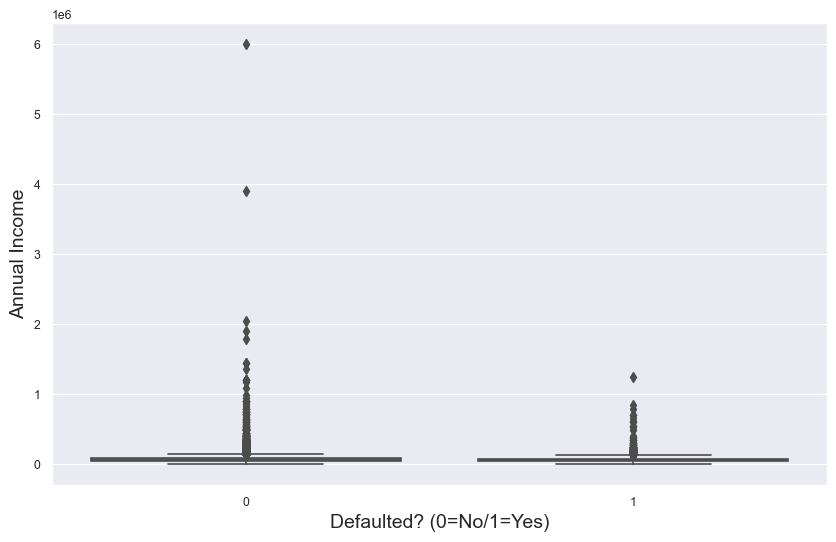

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


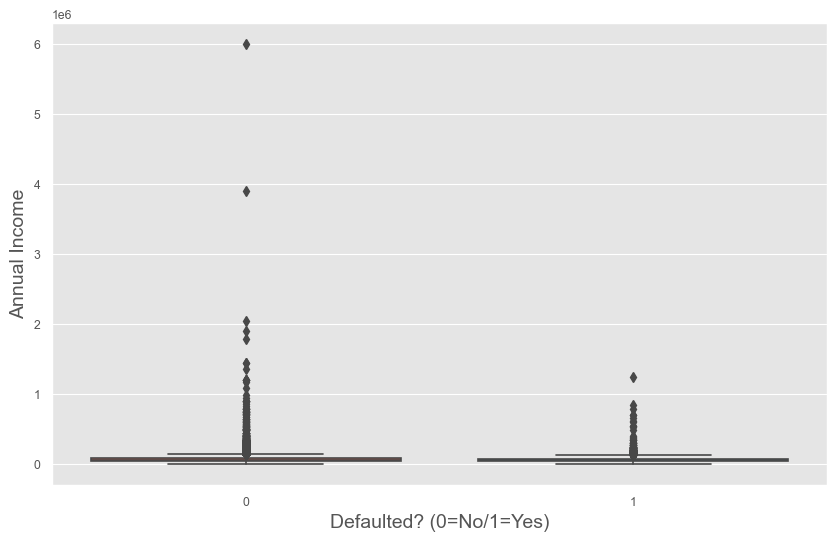

In [331]:
# Boxplot with Annual Income - Split between Defaulted and Non-Defaulted
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan)
ax.set_xlabel('Defaulted? (0=No/1=Yes)', fontsize=14)
ax.set_ylabel('Annual Income', fontsize=14)
plt.show()
import matplotlib.pyplot as plt

# Check available styles
print(plt.style.available)
plt.style.use('ggplot')  # Replace 'ggplot' with any available style
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan)
ax.set_xlabel('Defaulted? (0=No/1=Yes)', fontsize=14)
ax.set_ylabel('Annual Income', fontsize=14)
plt.show()



In [333]:
import pandas as pd

# Convert the 'annual_inc' column to numeric (this will convert strings to numbers)
loan['annual_inc'] = pd.to_numeric(loan['annual_inc'], errors='coerce')

# Calculate and print the quartiles and median
print("25th, 50th, 75th, 100th Percentiles of Annual Income:")
print("25th Percentile: ", loan['annual_inc'].quantile(0.25))
print("50th Percentile: ", loan['annual_inc'].quantile(0.50))  # Median
print("75th Percentile: ", loan['annual_inc'].quantile(0.75))
print("100th Percentile: ", loan['annual_inc'].quantile(1))

print("Median of Annual Income: ", loan['annual_inc'].median())


25th, 50th, 75th, 100th Percentiles of Annual Income:
25th Percentile:  40000.0
50th Percentile:  59000.0
75th Percentile:  82500.0
100th Percentile:  6000000.0
Median of Annual Income:  59000.0


In [335]:
# Extract records with top 99% of Annual Income as max and plot again (this is remove ouliers)

total = int(round(loan.annual_inc.count()*99/100))
loan_temp = pd.DataFrame({'defaulted': loan.defaulted, 'annual_inc': loan.annual_inc})
loan_temp = loan_temp.sort_values('annual_inc')
loan_temp = loan_temp.head(total)
loan_temp

,defaulted,annual_inc
42438,0,1896.0
42363,0,2000.0
41825,0,3300.0
42091,0,3500.0
41910,0,3600.0
...,...,...
29250,0,240734.0
33276,0,241875.0
29726,1,242004.0
16058,0,242400.0


Text(0, 0.5, 'Annual Income')

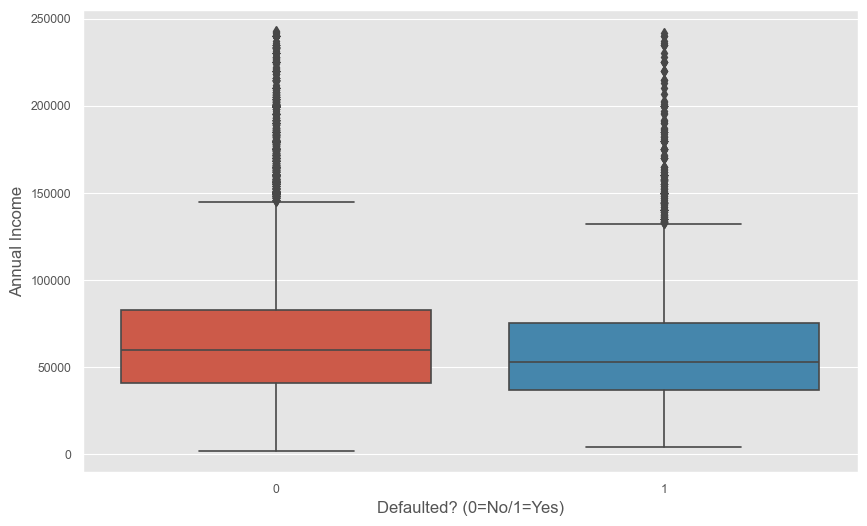

In [337]:
# Boxplot with Annual Income
ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan_temp)
ax.set_xlabel('Defaulted? (0=No/1=Yes)') 
ax.set_ylabel('Annual Income')

# Doesn't appear that there is any correlation between Annual Income and default ratio

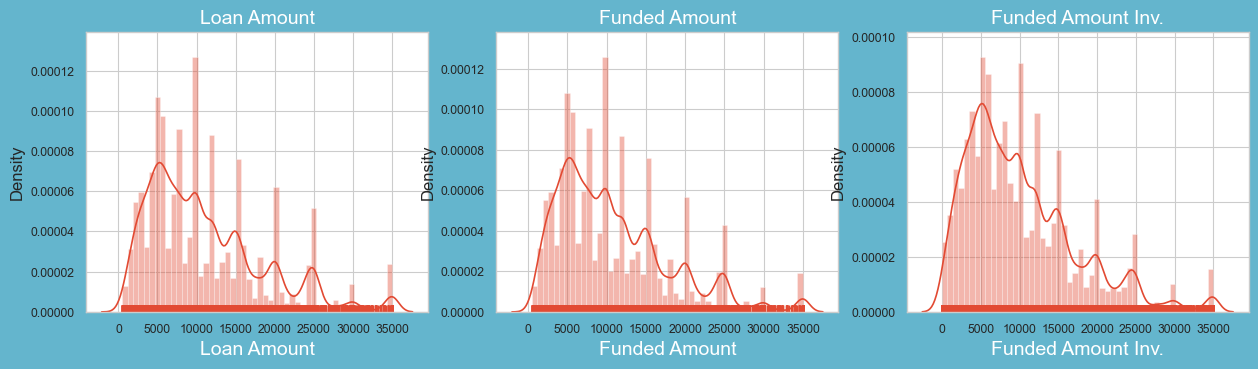

In [339]:
# Compare distribution of the three Loan Amount Fields  

plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")

# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan['loan_amnt'],rug = True)
ax.set_title('Loan Amount',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan['funded_amnt'],rug = True)
ax.set_title('Funded Amount',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv.',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# Most loans concentrated between $50K to $120K

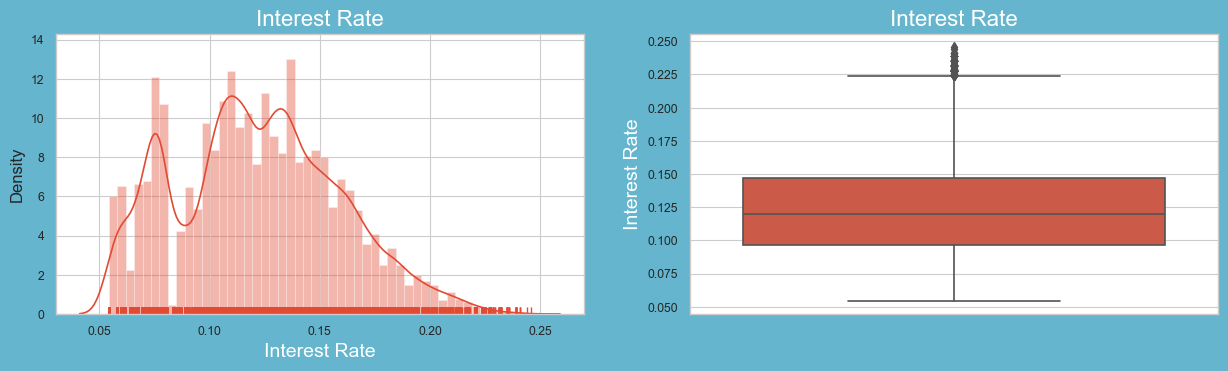

In [340]:
# Convert 'int_rate' to string first, then remove the '%' sign and convert to numeric
loan['int_rate'] = loan['int_rate'].astype(str)
loan['int_rate_num'] = loan['int_rate'].str.rstrip('%')
loan['int_rate_num'] = pd.to_numeric(loan["int_rate_num"], errors='coerce', downcast="float")

# Plotting the univariate analysis
plt.figure(figsize=(15, 8), facecolor='c')
sns.set_style("whitegrid")

# Subplot 1: Distribution plot for interest rates
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate_num'], rug=True)
ax.set_title('Interest Rate', fontsize=16, color='w')
ax.set_xlabel('Interest Rate', fontsize=14, color='w')

# Subplot 2: Boxplot for interest rates
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan['int_rate_num'])
ax.set_title('Interest Rate', fontsize=16, color='w')
ax.set_ylabel('Interest Rate', fontsize=14, color='w')

plt.show()


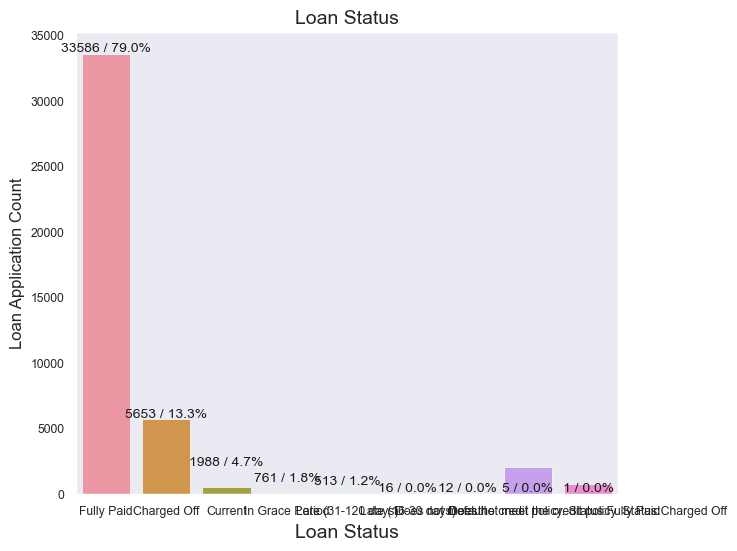

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(7, 6))
sns.set_style("dark")
ax = sns.countplot(x="loan_status", data=loan)
ax.set_title('Loan Status', fontsize=14)
ax.set_xlabel('Loan Status', fontsize=14)
ax.set_ylabel('Loan Application Count')

# To show the count of values above the bars
s = loan['loan_status'].value_counts()
tot = s.sum()

# Iterate over the value counts
for i, v in enumerate(s):
    txt = str(v) + " / " + str(round(v / tot * 100, 1)) + '%'
    ax.text(i, v + 200, txt, color='k', ha='center')

plt.show()

# Observations:
# The plot shows that close to 14% of loans were charged off out of the total loans issued.


## `Multi-variate Analysis - EDA`

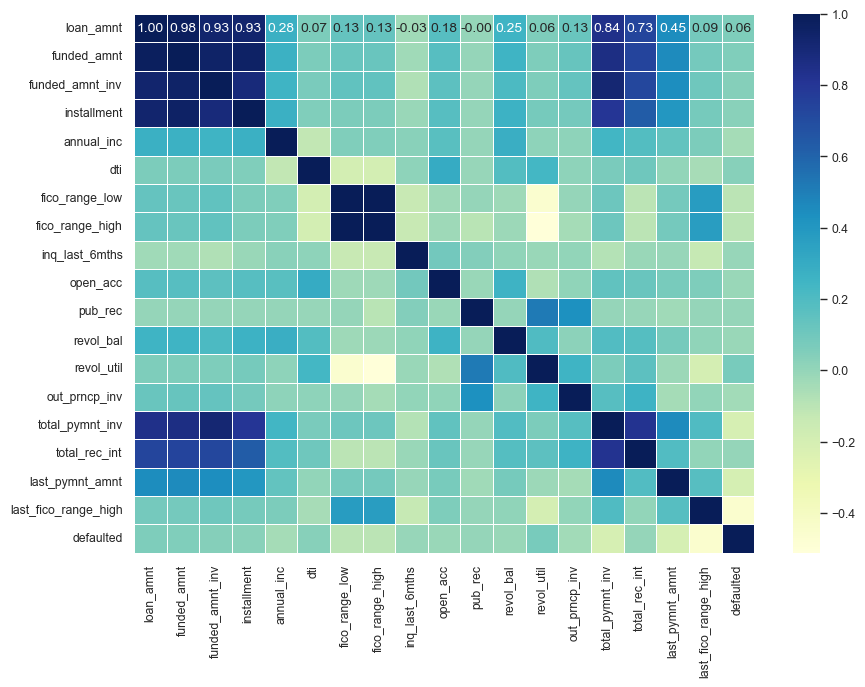

In [346]:
# Select only numeric columns
numeric_loan = loan.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_loan.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()


In [348]:
# Find out the number of Null values in invididual columns in the data

loan.isna().sum()

loan_amnt                   3
funded_amnt                 3
funded_amnt_inv             3
term                        3
int_rate                    0
installment                 3
grade                       3
sub_grade                   3
emp_title                2629
emp_length               1115
home_ownership              3
annual_inc                  7
verification_status         3
issue_d                     3
loan_status                 3
purpose                     3
zip_code                    3
addr_state                  3
dti                         3
earliest_cr_line           32
fico_range_low              3
fico_range_high             3
inq_last_6mths             32
open_acc                   32
pub_rec                    32
revol_bal                   3
revol_util                 93
total_acc                  32
out_prncp_inv               3
total_pymnt_inv             3
total_rec_int               3
last_pymnt_d               86
last_pymnt_amnt             4
next_pymnt

In [350]:
# Find out which fields with high percentage of null values

a = (loan.isnull().sum() / loan.shape[0]) * 100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'], ascending=False)

,Percentage of null values
next_pymnt_d,92.249283
emp_title,6.180356
pub_rec_bankruptcies,3.215948
emp_length,2.621186
revol_util,0.218628
last_pymnt_d,0.202172
earliest_cr_line,0.075227
inq_last_6mths,0.075227
open_acc,0.075227
pub_rec,0.075227


### `Unique values in each categorical feature`

In [353]:
# Get a Count of Unique Values across Non Numeric Variables

for i in loan.columns[loan.dtypes == 'object']:
    print(loan[i].value_counts())
    print('--------------------------------')

term
 36 months    31534
 60 months    11001
Name: count, dtype: int64
--------------------------------
int_rate
0.1099    970
0.1149    837
0.1349    832
0.0751    787
0.0788    742
         ... 
0.244       1
0.2148      1
0.1741      1
0.2264      1
0.1744      1
Name: count, Length: 395, dtype: int64
--------------------------------
grade
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: count, dtype: int64
--------------------------------
sub_grade
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: count, dtype: int64
--------------------------------
emp_title
US Army                             139
Bank of America

### `Feature Exgineering - introduce a Bin-based categorical Feature`

In [356]:
# Count the Numbers of Defaulted vs non-Defaulted in various income brackets (bins)

# Apply Binning on Annual Income ['0-30000, 30000-60000, 60000-100000, 100000+]

loan_temp['anninc_bin'] = 'NB'
loan_temp['annual_inc'] = loan_temp['annual_inc'].astype(int)

def bininc(incparam):
    if incparam >= 0 and incparam < 30000:
        return '0-30K'
    elif incparam >= 30000 and incparam < 60000:
        return '30-60K'
    elif incparam >= 60000 and incparam < 100000:
        return '60-100K'
    elif incparam >= 100000:
        return '100K+'

loan_temp['anninc_bin'] = loan.annual_inc.apply(bininc) 


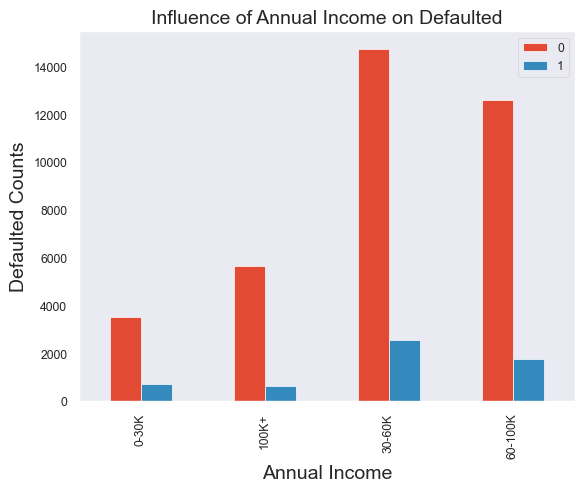

In [358]:
# Correlation between Annual Income and Defaulted after Binning Annual Income

pd.crosstab(loan_temp.anninc_bin,loan_temp.defaulted).plot(kind='bar')
plt.title('Influence of Annual Income on Defaulted', fontsize=14)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.legend()

[Text(0, 0, '0-30K'),
 Text(1, 0, '100K+'),
 Text(2, 0, '30-60K'),
 Text(3, 0, '60-100K')]

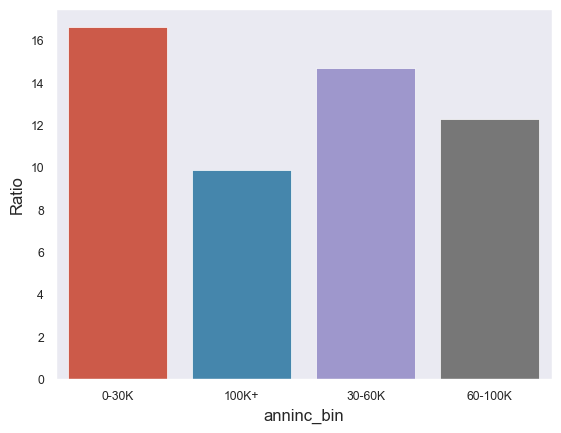

In [360]:
# Plot Annual_income brackets and Ratio of Default in these brackets

df_anninc = loan_temp[loan_temp.defaulted == 1].groupby(['anninc_bin']).defaulted.count().reset_index()
df_aninctot = loan_temp.groupby(['anninc_bin'])[['defaulted']].count().reset_index()
df_anincfull = pd.merge(df_anninc, df_aninctot, left_on='anninc_bin', right_on='anninc_bin', how='left')
df_anincfull['Ratio'] = df_anincfull.defaulted_x/df_anincfull.defaulted_y*100
ax = sns.barplot(x=df_anincfull.anninc_bin, y=df_anincfull.Ratio)
ax.set_xticklabels(df_anincfull.anninc_bin)

# Observation: The default ratio of borrowers in the Income bracket of 0-30K is high. 

In [362]:
df_anincfull

,anninc_bin,defaulted_x,defaulted_y,Ratio
0,0-30K,700,4209,16.631029
1,100K+,617,6266,9.846792
2,30-60K,2537,17262,14.697022
3,60-100K,1764,14369,12.276428


In [364]:
# Drop rows with NaN in funded_amnt
loan = loan.dropna(subset=['funded_amnt'])

# Convert to integer
loan['funded_amnt'] = loan['funded_amnt'].astype(int)

# Define the binning function
def binfamt(dfamt): 
    if dfamt >= 0 and dfamt < 10000:
        return '0-10K'
    elif dfamt >= 10000 and dfamt < 20000:
        return '10-20K'
    elif dfamt >= 20000:
        return '20K+'

# Apply the binning function
loan['famnt'] = loan['funded_amnt'].apply(binfamt)
loan['famnt']


0         0-10K
1         0-10K
2         0-10K
3        10-20K
4         0-10K
          ...  
42531     0-10K
42532     0-10K
42533     0-10K
42534     0-10K
42535     0-10K
Name: famnt, Length: 42535, dtype: object

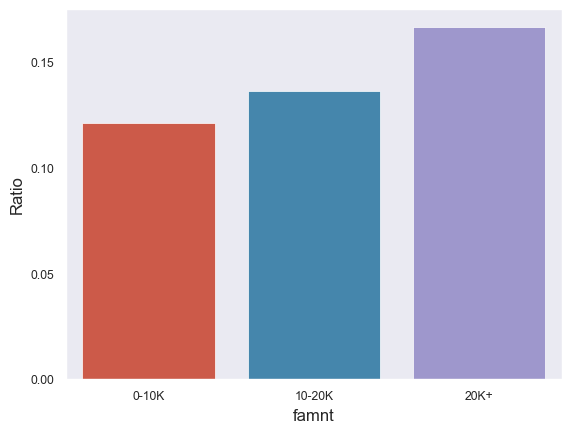

In [366]:
# Plot against Ratio of Default and Funded Amount

dtidef = loan[loan.defaulted == 1].groupby(['famnt'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['famnt'])[['defaulted']].count().reset_index()
dtifull = pd.merge(dtidef, dtitot, left_on='famnt', right_on='famnt', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"})
dtifull['Ratio'] = dtifull.defaulted_x/dtifull.defaulted_y
dtifull
ax = sns.barplot(x=dtifull.famnt, y=dtifull.Ratio)
sns.set(font_scale = 2)

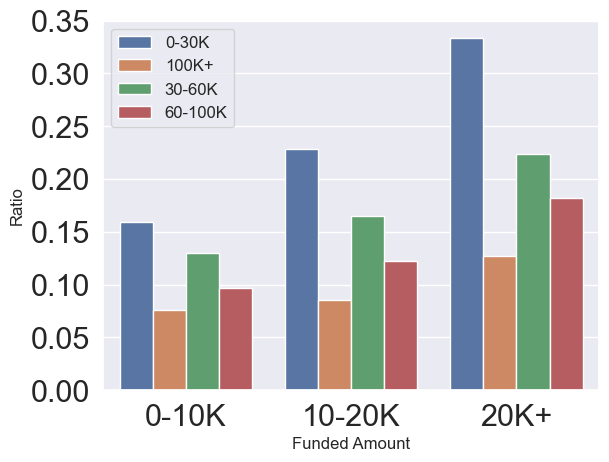

In [368]:
# Create a combination of Funded Amount and Annual Income and find Infleunce of this Combination on Default
# famnt - is the field in Loan DF that has bin tags on Funded Amount
# anninc_bin - is the field in Loan DF that has bin tags on Annual Income

def bininc(incparam):
    if incparam >= 0 and incparam < 30000:
        return '0-30K'
    elif incparam >= 30000 and incparam < 60000:
        return '30-60K'
    elif incparam >= 60000 and incparam < 100000:
        return '60-100K'
    elif incparam >= 100000:
        return '100K+'  
    
loan['anninc_bin'] = loan.annual_inc.apply(bininc)

fmnt_ainc = loan[loan.defaulted == 1].groupby(['famnt', 'anninc_bin'])[['defaulted']].count().reset_index()

df_fa = loan.groupby(['famnt', 'anninc_bin'])[['defaulted']].count().reset_index()

fafull = pd.merge(fmnt_ainc, df_fa, left_on=['famnt', 'anninc_bin'], right_on=['famnt', 'anninc_bin'], how='left')
fafull['Ratio'] = fafull.defaulted_x/fafull.defaulted_y
fafull

ax = sns.barplot(x="famnt", hue="anninc_bin", y="Ratio", data=fafull)

plt.xlabel('Funded Amount', fontsize=12)
plt.ylabel('Ratio', fontsize=12)
plt.rc('xtick', labelsize=4) 
plt.rc('ytick', labelsize=4) 
plt.legend(fontsize=12)

# Observation: For the Funded Amount Bracket of 20K+, there is an exceptionally high ratio of 50% for borrowers
# in the income bracket of 0-30K. However, exaination of the data reveals that that was only 1 default 
# out of 2 borrower in that category.

In [370]:
fafull

,famnt,anninc_bin,defaulted_x,defaulted_y,Ratio
0,0-10K,0-30K,604,3790,0.159367
1,0-10K,100K+,138,1814,0.076075
2,0-10K,30-60K,1336,10307,0.129621
3,0-10K,60-100K,571,5911,0.096600
4,10-20K,0-30K,95,416,0.228365
5,10-20K,100K+,218,2555,0.085323
6,10-20K,30-60K,1004,6073,0.165322
7,10-20K,60-100K,710,5806,0.122287
8,20K+,0-30K,1,3,0.333333
9,20K+,100K+,296,2322,0.127476


In [372]:
# Select only numeric columns
numeric_columns = loan.select_dtypes(include=['number'])

# Group by 'defaulted' and calculate the mean of numeric columns
mean_comparison = numeric_columns.groupby(loan['defaulted']).mean().round()

mean_comparison


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,out_prncp_inv,total_pymnt_inv,total_rec_int,last_pymnt_amnt,last_fico_range_high,defaulted,int_rate_num
defaulted,,,,,,,,,,,,,,,,,,,,
0,10930.0,10675.0,10024.0,320.0,70157.0,13.0,714.0,718.0,1.0,9.0,0.0,14411.0,0.0,14.0,12042.0,2242.0,2963.0,704.0,0.0,0.0
1,12134.0,11781.0,10895.0,337.0,62483.0,14.0,704.0,708.0,1.0,9.0,0.0,13557.0,1.0,0.0,6452.0,2222.0,327.0,596.0,1.0,0.0


In [376]:
# Is there any significant difference between Requested Loan Amount and Funded/Disbursed Amount - 
# calculated in percentages

print(((loan.loan_amnt-loan.funded_amnt)/loan.loan_amnt).sort_values(ascending=False).head(10))
print(((loan.loan_amnt-loan.funded_amnt)/loan.loan_amnt).sort_values(ascending=False).tail(10))

23623    0.898750
23363    0.897500
23355    0.889286
23483    0.867500
23404    0.847500
38909    0.845313
23416    0.841071
36963    0.841000
36966    0.830556
38800    0.817000
dtype: float64
14461    0.0
14470    0.0
14462    0.0
14463    0.0
14464    0.0
14465    0.0
14466    0.0
14467    0.0
14468    0.0
42535    0.0
dtype: float64


### `Find correlation between Default status and Grade/Sub-Grades of Loans`

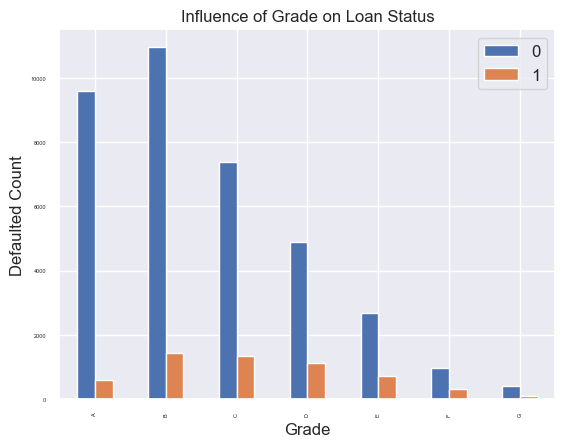

In [379]:
# Correlation between Grade of Loan and Defaulted

ct = pd.crosstab(loan.grade,loan.defaulted)
ct.plot(kind='bar')
plt.title('Influence of Grade on Loan Status', fontsize=12)

plt.xlabel('Grade', fontsize=12)
plt.ylabel('Defaulted Count', fontsize=12)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: The default ratio is fairly proportional to the total in each Grade. 
# None of the individual grades stand out as exception in default ratio. 

In [381]:
ct['ratio'] = (ct[1]/ct[0]*100).round(2)
ct

defaulted,0,1,ratio
grade,,,
A,9581,602,6.28
B,10959,1430,13.05
C,7387,1353,18.32
D,4890,1126,23.03
E,2674,720,26.93
F,980,321,32.76
G,411,101,24.57


In [383]:
# Observation: Grade G, F, E, D have very high Default ratio

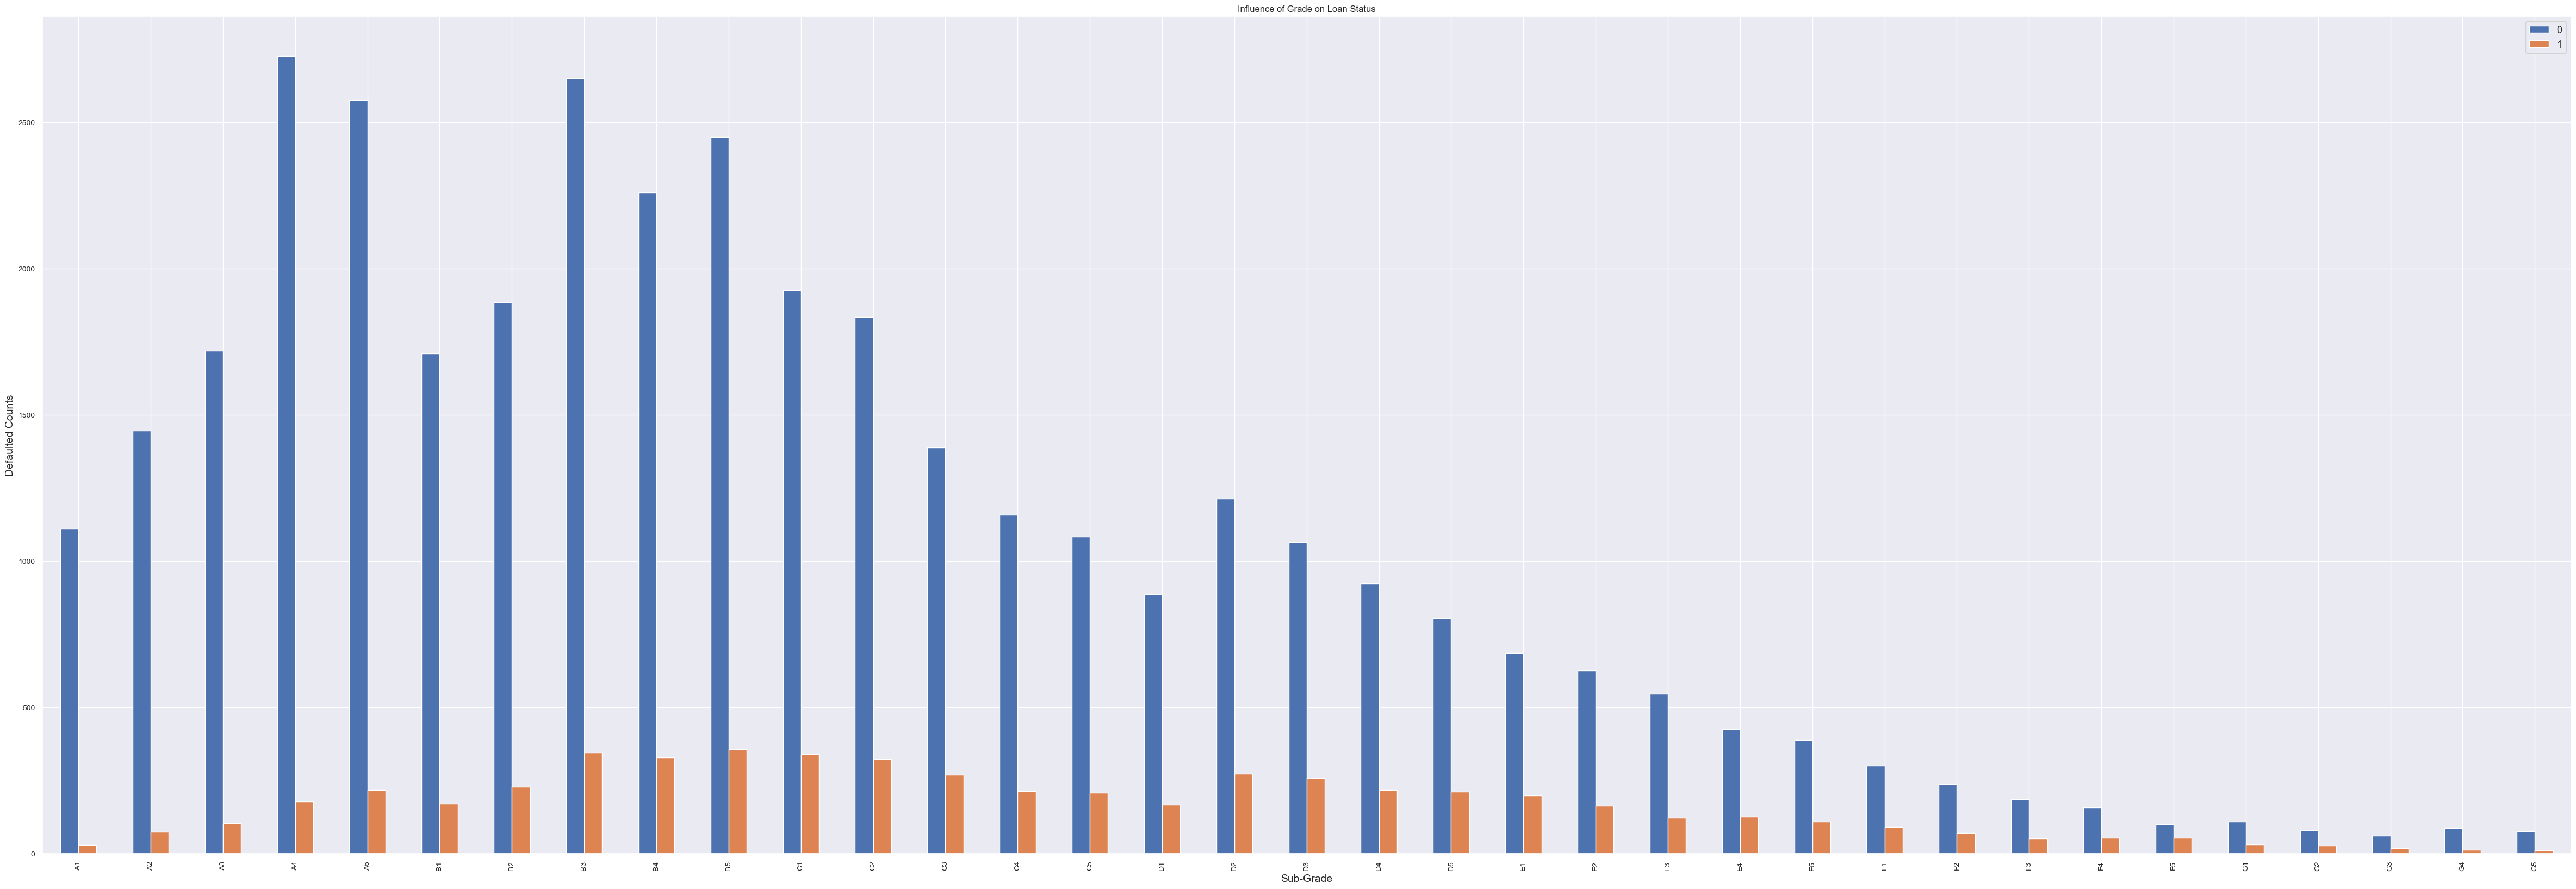

In [385]:
# Correlation between Sub-Grade of Loan and Defaulted

ct = pd.crosstab(loan.sub_grade,loan.defaulted)
ct.plot(kind='bar', figsize=(60,20))
plt.title('Influence of Grade on Loan Status', fontsize=12)
plt.xlabel('Sub-Grade', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.legend(fontsize=13)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

# Observation: The default ratio is fairly proportional to the total in each Grade. 
# None of the individual grades stand out as exception in default ratio. 

In [386]:
ct['ratio'] = (ct[1]/ct[0]*100).round(2)
ct

defaulted,0,1,ratio
sub_grade,,,
A1,1112,30,2.70
A2,1446,74,5.12
A3,1720,103,5.99
A4,2727,178,6.53
A5,2576,217,8.42
B1,1711,171,9.99
B2,1885,228,12.10
B3,2651,346,13.05
B4,2261,329,14.55


In [389]:
# Observations: Some of the Sub-grade of Loans have very high Default rate

### `Find correlation between Default and State`

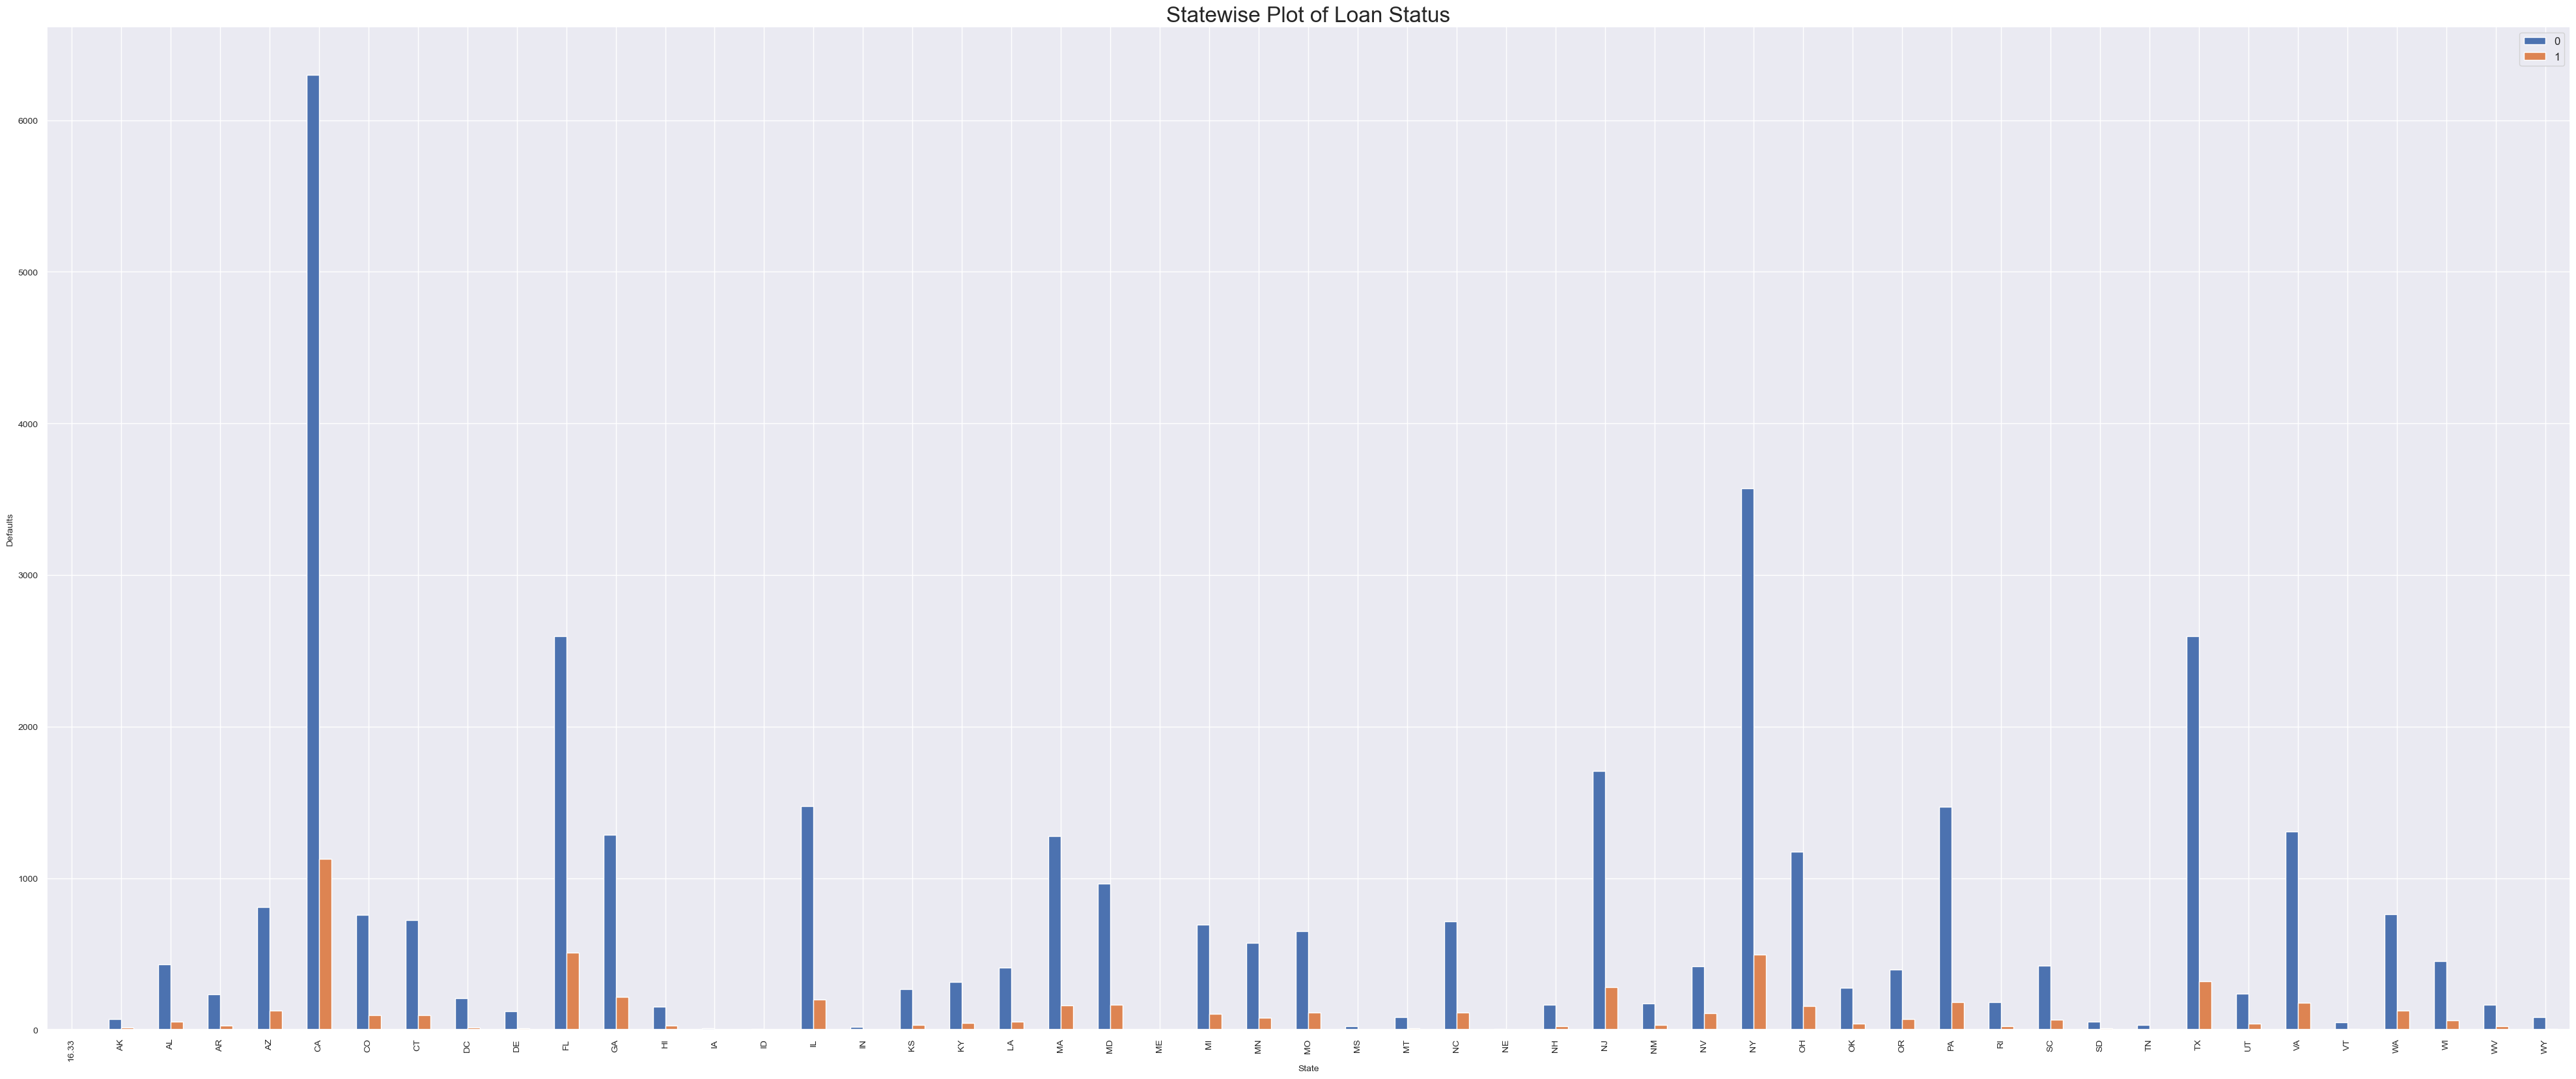

In [392]:
# Plot Relation between "loan_status" and "state"

pd.crosstab(loan.addr_state.str.upper(),loan.defaulted).plot(kind='bar', figsize=(50,20))
plt.title('Statewise Plot of Loan Status')
plt.xlabel('State', fontsize=10)
plt.ylabel('Defaults', fontsize=10)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend(fontsize=12)

# Observation: The default ratio is fairly proportional to the total in each State. 
# None of the individual States stand out as exception in default ratio. 

[Text(0, 0, ' 36 months'), Text(1, 0, ' 60 months')]

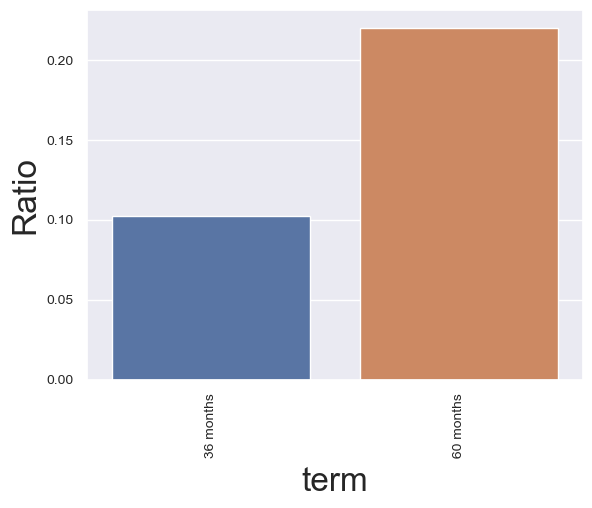

In [393]:
# Plot against Ratio of Default and Term

df_term = loan[loan.defaulted == 1].groupby(['term'])[['defaulted']].count().reset_index()
df_trmtot = loan.groupby(['term'])[['defaulted']].count().reset_index()
df_trmfull = pd.merge(df_term, df_trmtot, left_on='term', right_on='term', how='left')
df_trmfull['Ratio'] = df_trmfull.defaulted_x/df_trmfull.defaulted_y
ax = sns.barplot(x=df_trmfull.term, y=df_trmfull.Ratio)
sns.set(font_scale = 0.5)
ax.set_xticklabels(df_trmfull.term, rotation=90)

# Observation: 60 month tenured loans have much higher default rate

### `Finding any corelation between employer and default ratio`

In [397]:
# List the companies from where the most number of defaulted individuals come from

loan.emp_title.value_counts().head(20)

emp_title
US Army                    139
Bank of America            115
IBM                         72
Kaiser Permanente           61
AT&T                        61
UPS                         58
Wells Fargo                 57
USAF                        56
US Air Force                55
Self Employed               49
United States Air Force     48
Walmart                     47
Lockheed Martin             46
State of California         45
Verizon Wireless            43
U.S. Army                   42
Walgreens                   41
USPS                        41
US ARMY                     40
Self                        39
Name: count, dtype: int64

In [399]:
# Find out Companywise Default ratio for companies occurring > 20 and highest ratio of Default 
# to find if there is any correlation to companies

loan.emp_title = loan.emp_title.str.upper()
employers = loan.groupby(['emp_title'])['defaulted'].count()
employers = employers.reset_index().sort_values('defaulted', ascending=False)
emp_defaults = loan.groupby(['emp_title'])['defaulted'].sum()
emp_defaults = emp_defaults.reset_index().sort_values('defaulted', ascending=False)
employers.rename(columns = {'defaulted': "Totals"}, inplace=True)
employers_f = pd.merge(employers, emp_defaults, left_on='emp_title', right_on='emp_title')
employers_f['Default_Ratio'] = round(employers_f.defaulted/employers_f.Totals*100, 4)
employers_f = employers_f.sort_values('Default_Ratio', ascending=False)
employers_f[employers_f.Totals > 20]

# Observation: Staff from some of the employers have high propensity of default. 

,emp_title,Totals,defaulted,Default_Ratio
49,WAL-MART,24,6,25.0000
9,UPS,69,17,24.6377
2,WALMART,84,20,23.8095
63,INTERNAL REVENUE SERVICE,21,5,23.8095
57,US BANK,22,5,22.7273
...,...,...,...,...
24,JPMORGAN CHASE,45,2,4.4444
47,COSTCO WHOLESALE,25,1,4.0000
55,TIME WARNER CABLE,23,0,0.0000
51,PRICEWATERHOUSECOOPERS,24,0,0.0000


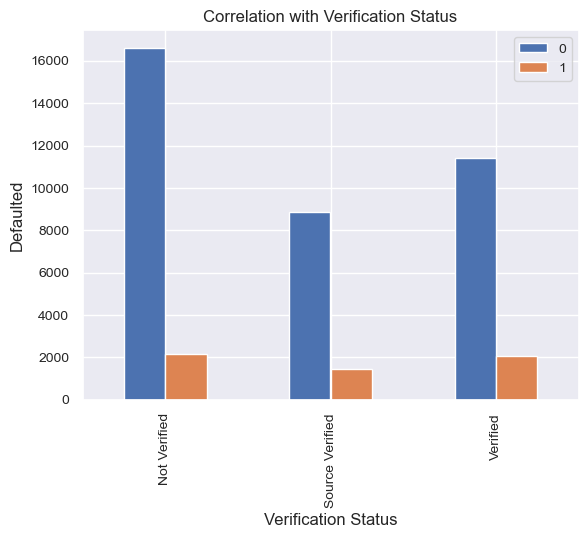

In [401]:
# Plot against Verification Status

pd.crosstab(loan.verification_status,loan.defaulted).plot(kind='bar')
plt.title('Correlation with Verification Status', fontsize=12)
plt.xlabel('Verification Status', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)


# Observation: The default ratio is fairly proportional to the total in each Category of Verification Status. 
# None of the individual Verification Status stand out as exception in default ratio. 

In [403]:
temp = pd.crosstab(loan.verification_status,loan.defaulted)
temp['ratio'] = temp[1]/temp[0]*100
temp

# Observation: Stangely, 'Verified' loans have a higher default ratio 

defaulted,0,1,ratio
verification_status,,,
Not Verified,16614,2144,12.904779
Source Verified,8862,1444,16.294290
Verified,11406,2065,18.104506


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.06, '0.06'),
  Text(0, 0.08, '0.08'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.12, '0.12'),
  Text(0, 0.14, '0.14'),
  Text(0, 0.16, '0.16'),
  Text(0, 0.18, '0.18')])

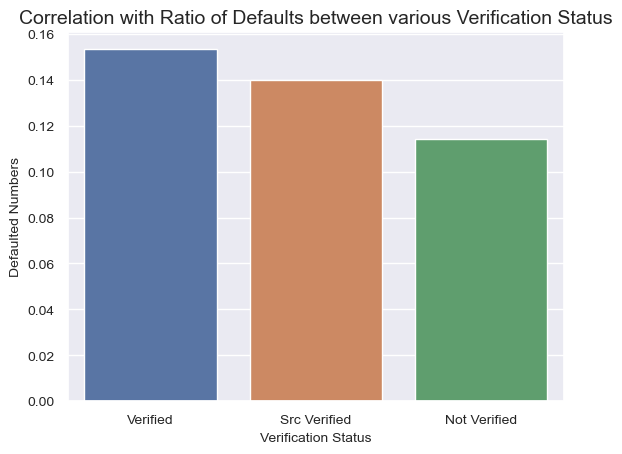

In [405]:
# Plot against Ratio of Default and Verification Status

loan_verified = loan[(loan.verification_status == 'Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Verified'].verification_status.count()
loan_srcverified = loan[(loan.verification_status == 'Source Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Source Verified'].verification_status.count()
loan_notverified = loan[(loan.verification_status == 'Not Verified') & (loan.defaulted == 1)].verification_status.count()/loan[loan.verification_status == 'Not Verified'].verification_status.count()

ax = sns.barplot(x=['Verified', 'Src Verified', 'Not Verified'], y=[loan_verified, loan_srcverified, loan_notverified])
plt.title('Correlation with Ratio of Defaults between various Verification Status', fontsize=14)
plt.xlabel('Verification Status', fontsize=10)
plt.ylabel('Defaulted Numbers', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


       loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
26       15000.0        15000           8725.0   36 months   0.1427   
2731      8000.0         8000           3975.0   36 months   0.1465   
3625      6400.0         6400           6400.0   60 months   0.1825   
3998     18000.0        18000          18000.0   60 months   0.1903   
4220      1800.0         1800           1800.0   36 months    0.089   
...          ...          ...              ...         ...      ...   
40915    24000.0        24000          23075.0   36 months   0.1426   
40928    25000.0        25000          23225.0   36 months   0.1392   
41146     4600.0         4600           4600.0   36 months   0.1568   
41888     3200.0         3200           2875.0   36 months   0.1671   
41932     3000.0         3000           3000.0   36 months   0.1071   

       installment grade sub_grade                  emp_title emp_length  ...  \
26          514.64     C        C2                NYC TRANSIT    9

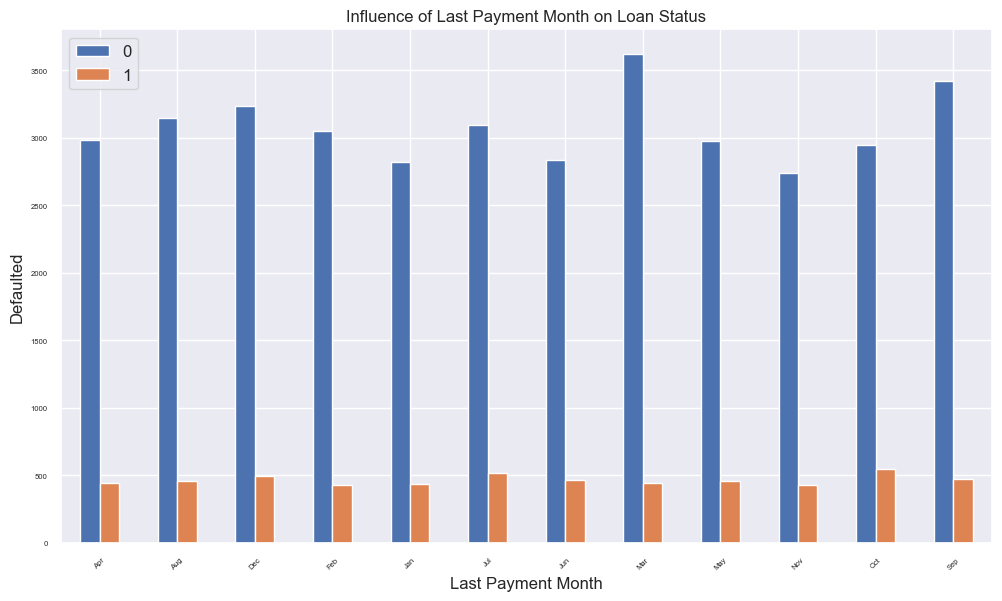

In [407]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for non-date values
invalid_dates = loan[~loan['last_pymnt_d'].str.match(r'^\d{4}-\d{2}$', na=False)]
print(invalid_dates)

# Convert 'last_pymnt_d' to datetime, coercing errors to NaT
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'], format='%Y-%m', errors='coerce')

# Drop rows with NaT values in 'last_pymnt_d'
loan = loan.dropna(subset=['last_pymnt_d'])

# Extract the month name
loan['month_last_pymnt'] = loan['last_pymnt_d'].dt.strftime("%b")

# Create a crosstab and plot
pd.crosstab(loan['month_last_pymnt'], loan['defaulted']).plot(kind='bar', figsize=(10, 6))
plt.title('Influence of Last Payment Month on Loan Status', fontsize=12)
plt.xlabel('Last Payment Month', fontsize=12)
plt.ylabel('Defaulted', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


### `Influence on default by tenure of employment`

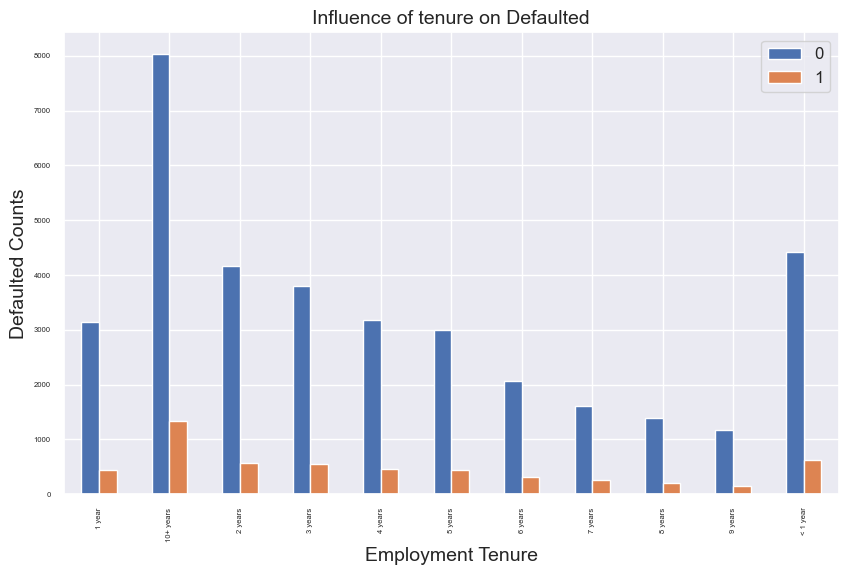

In [415]:
# Influence of length of employment

%matplotlib inline
pd.crosstab(loan.emp_length,loan.defaulted).plot(kind='bar', figsize=(10,6))
plt.title('Influence of tenure on Defaulted', fontsize=14)
plt.xlabel('Employment Tenure', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.legend(fontsize=12)

# Observation: No real exception observed

In [417]:
ct = pd.crosstab(loan.emp_length,loan.defaulted)
ct['ratio'] = ct[1]/ct[0]*100
ct

defaulted,0,1,ratio
emp_length,,,
1 year,3135,447,14.258373
10+ years,8028,1331,16.579472
2 years,4172,563,13.494727
3 years,3807,550,14.447071
4 years,3184,457,14.353015
5 years,2999,450,15.005002
6 years,2065,307,14.866828
7 years,1612,262,16.253102
8 years,1385,203,14.657040


Can apply binning on length of employment to find out category-wise default ratio

Text(0, 0.5, 'Ratio')

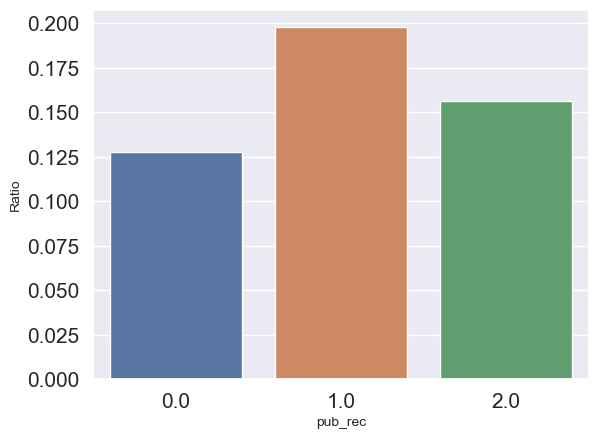

In [420]:
# Plot against Ratio of Default and pub_rec

df_pr = loan[loan.defaulted == 1].groupby(['pub_rec'])[['defaulted']].count().reset_index()
df_prtot = loan.groupby(['pub_rec'])[['defaulted']].count().reset_index()
df_prfull = pd.merge(df_pr, df_prtot, left_on='pub_rec', right_on='pub_rec', how='left')
df_prfull['Ratio'] = df_prfull.defaulted_x/df_prfull.defaulted_y
ax = sns.barplot(x=df_prfull.pub_rec, y=df_prfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_prfull.pub_rec)
plt.xlabel('pub_rec', fontsize=10)
plt.ylabel('Ratio', fontsize=10)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '0'),
 Text(4, 0, '1')]

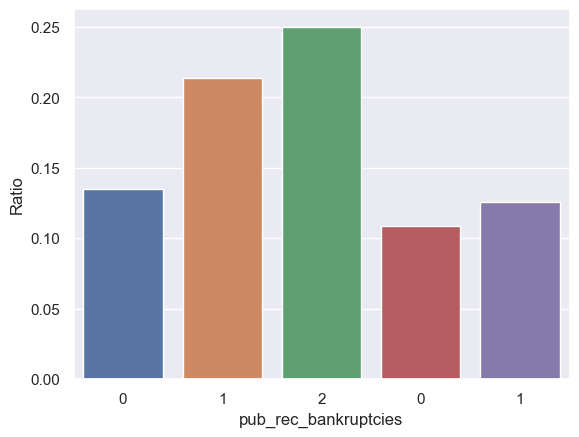

In [422]:
# Plot against Ratio of Default and pub_rec_bankruptcies

df_prb = loan[loan.defaulted == 1].groupby(['pub_rec_bankruptcies'])[['defaulted']].count().reset_index()
df_prbtot = loan.groupby(['pub_rec_bankruptcies'])[['defaulted']].count().reset_index()
df_prbfull = pd.merge(df_prb, df_prbtot, left_on='pub_rec_bankruptcies', right_on='pub_rec_bankruptcies', how='left')
df_prbfull['Ratio'] = df_prbfull.defaulted_x/df_prbfull.defaulted_y
ax = sns.barplot(x=df_prbfull.pub_rec_bankruptcies, y=df_prbfull.Ratio)
sns.set(font_scale = 1)
ax.set_xticklabels(df_prbfull.pub_rec_bankruptcies)

# Observations: Bowrrowers with pub_rec_bankruptcies value 2 have a much higher propensity to default

In [424]:
# Drop rows with NaN in total_acc
loan = loan.dropna(subset=['total_acc'])

# Convert to integer
loan['total_acc'] = loan['total_acc'].astype(int)

# Define the binning function
def bintacc(ptacc): 
    if ptacc >= 0 and ptacc < 20:
        return '0-20'
    elif ptacc >= 20 and ptacc < 40:
        return '20-40'
    elif ptacc >= 40 and ptacc < 60:
        return '40-60'
    elif ptacc >= 60:
        return '60+'

# Apply the binning function
loan['tacc'] = loan['total_acc'].apply(bintacc)

loan['tacc']


0         0-20
1         0-20
2         0-20
3        20-40
4        20-40
         ...  
42509     0-20
42511    20-40
42512     0-20
42513     0-20
42514     0-20
Name: tacc, Length: 42422, dtype: object

In [426]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']*100
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),Total,Chargedoff_Proportion
11,small_business,468.0,34.0,0.0,72.0,89.0,1320.0,0.0,0.0,1.0,1822.0,25.686059
10,renewable_energy,18.0,0.0,0.0,1.0,2.0,84.0,0.0,0.0,0.0,102.0,17.647059
3,educational,53.0,0.0,0.0,32.0,65.0,269.0,0.0,0.0,0.0,322.0,16.459627
8,moving,92.0,1.0,0.0,14.0,31.0,490.0,0.0,0.0,0.0,583.0,15.780446
9,other,625.0,61.0,0.0,112.0,278.0,3302.0,1.0,1.0,1.0,3988.0,15.672016
7,medical,105.0,5.0,0.0,22.0,36.0,584.0,0.0,0.0,0.0,694.0,15.129683
5,house,57.0,9.0,0.0,11.0,33.0,313.0,1.0,0.0,0.0,379.0,15.039578
2,debt_consolidation,2756.0,285.0,0.0,289.0,807.0,15585.0,13.0,2.0,6.0,18626.0,14.796521
12,vacation,53.0,2.0,0.0,6.0,13.0,325.0,0.0,1.0,0.0,380.0,13.947368
4,home_improvement,346.0,32.0,0.0,69.0,143.0,2600.0,1.0,1.0,2.0,2978.0,11.618536


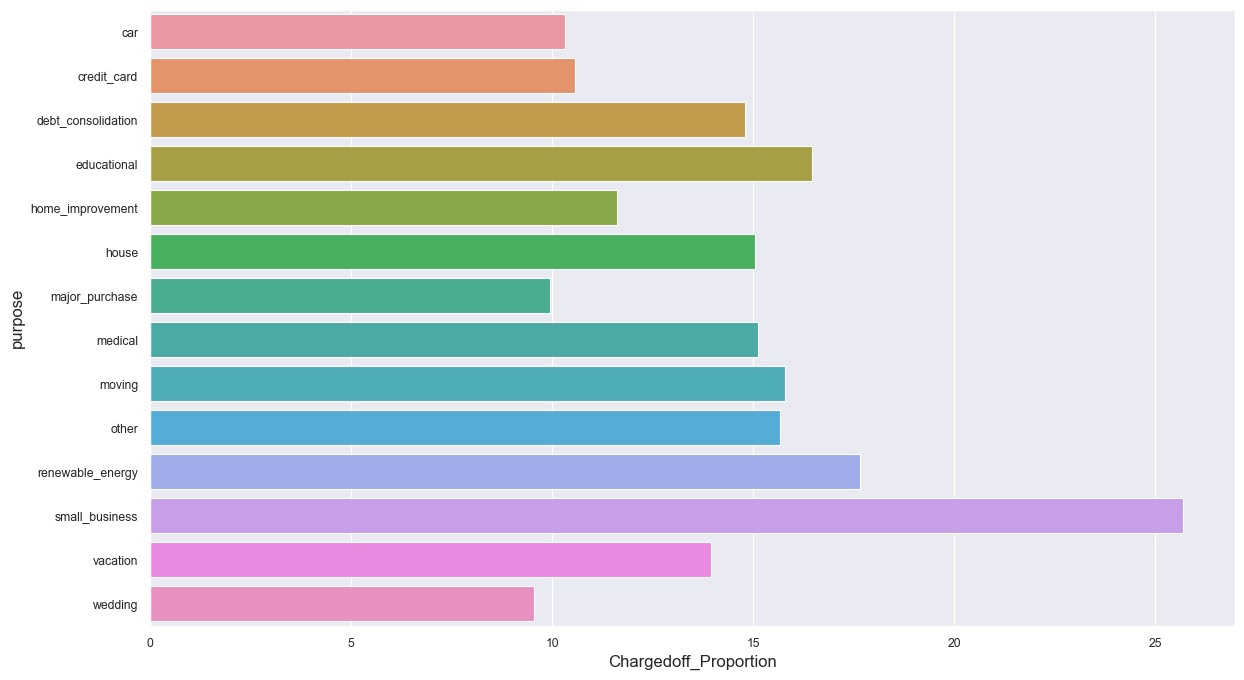

In [428]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

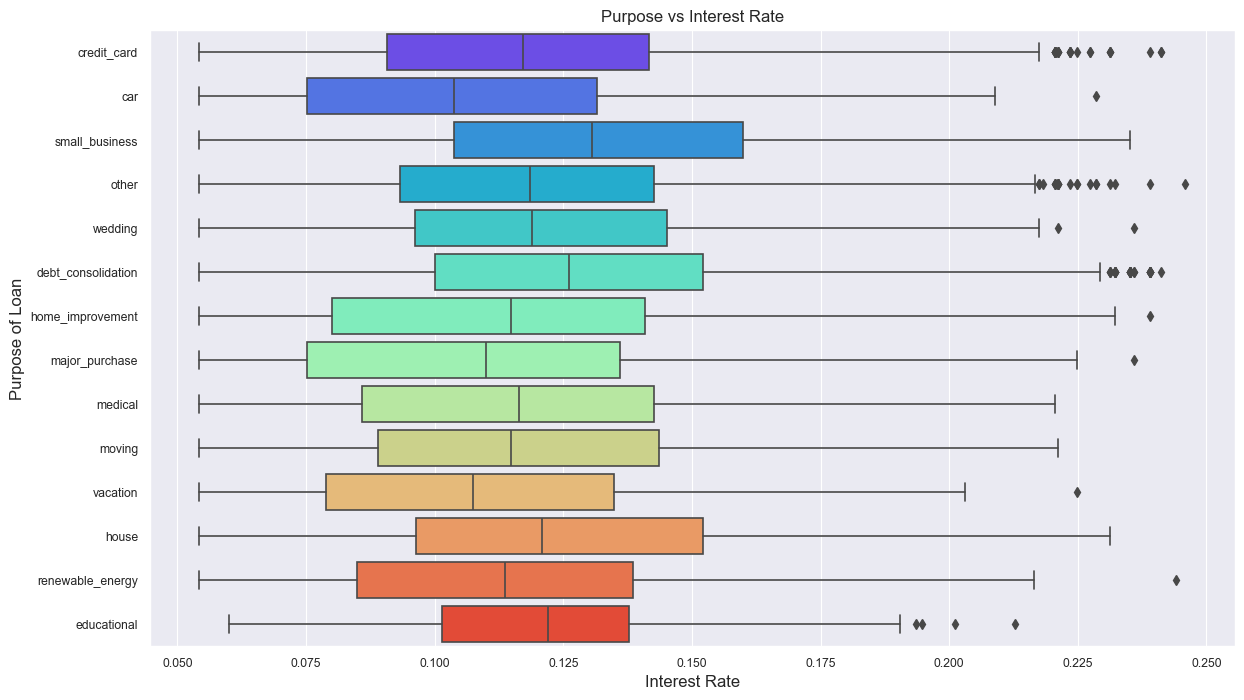

In [430]:
# Bivariate Analysis - Purpose vs Interest Rate
# Box Plot

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='int_rate_num', y='purpose', data =loan, palette='rainbow')
ax.set_title('Purpose vs Interest Rate')
ax.set_xlabel('Interest Rate')
ax.set_ylabel('Purpose of Loan')
plt.show()

# Observations:
# It is clear that avearge intrest rate is highest for small business purpose.
# Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.
# Debt consolidation is 2nd where borrowers had to pay more interest rate.
# Both of these features have many outlier on the upper end that may lead to default. 

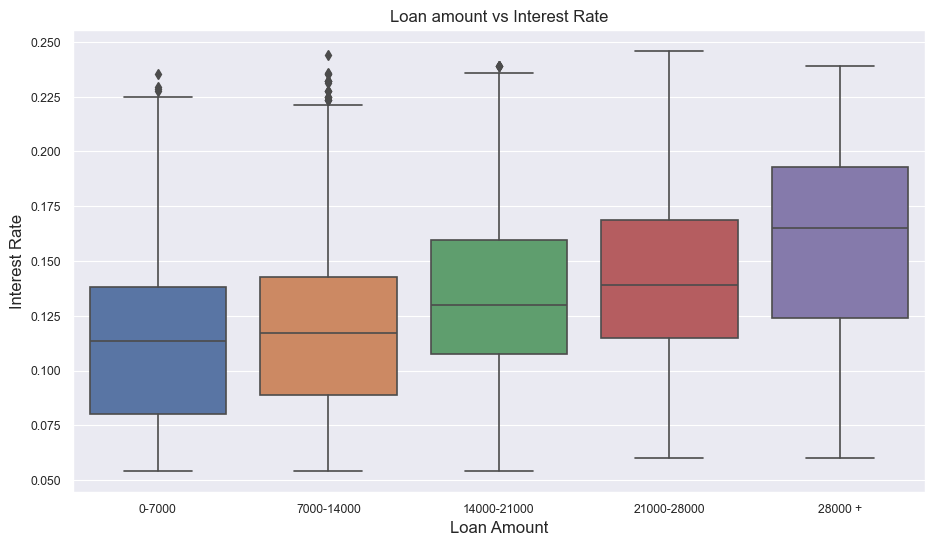

In [431]:
# Understand relationship between Loan Amount vs Interest Rate

# Create a loan amount category field with various brackets

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], 
                                labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(11,6))
ax = sns.boxplot(y='int_rate_num', x='loan_amnt_cats', data=loan)
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

# Observations: Higher the loan_amount, higher the interest rate.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

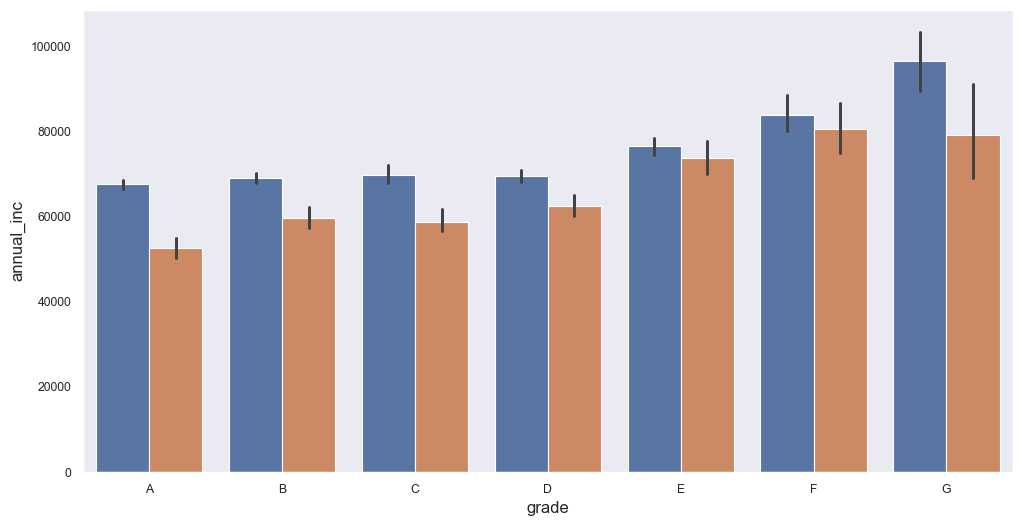

In [434]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12})  
plt.figure(figsize=(12,6))
sns.set_style("dark")
ax=sns.barplot(x='grade', y='annual_inc', hue="defaulted", data=loan, estimator=np.mean, order='ABCDEFG')
ax.set_title('Grade vs Annual income')
ax.set_ylabel('Annual income')
ax.set_xlabel('Grades')
plt.legend()
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have much lower average annual incomes

### `Find out Correlation between Interest Rate and Default`

In [ ]:
# Apply Binning on interest amount ['0-8%', '8-13%', '13-18%, '18%+']

loan['int_ratet'] = 0
loan['int_rate'] = loan['int_rate'].str.replace('\%', '')
loan['int_rate'] = loan['int_rate'].astype(float)
def bininst(tinrst): 
    if tinrst >= 0 and tinrst < 8:
        return '0-8%'
    elif tinrst >= 8 and tinrst < 13:
        return '8-13%'
    elif tinrst >= 13 and tinrst < 18:
        return '13-18%'
    elif tinrst >= 18:
        return '18%+'

loan['int_ratet'] = loan.int_rate.apply(bininst) 
loan['int_ratet']

In [437]:
import pandas as pd

# Ensure the column is of type string
loan['int_rate'] = loan['int_rate'].astype(str)

# Remove the '%' sign and convert to float
loan['int_rate'] = loan['int_rate'].str.replace('%', '', regex=False).astype(float)

# Define the binning function
def bininst(tinrst):
    if tinrst >= 0 and tinrst < 8:
        return '0-8%'
    elif tinrst >= 8 and tinrst < 13:
        return '8-13%'
    elif tinrst >= 13 and tinrst < 18:
        return '13-18%'
    elif tinrst >= 18:
        return '18%+'

# Apply the binning function
loan['int_ratet'] = loan['int_rate'].apply(bininst)

# Display the results to verify
print(loan[['int_rate', 'int_ratet']].head())


   int_rate int_ratet
0    0.1065      0-8%
1    0.1527      0-8%
2    0.1596      0-8%
3    0.1349      0-8%
4    0.1269      0-8%


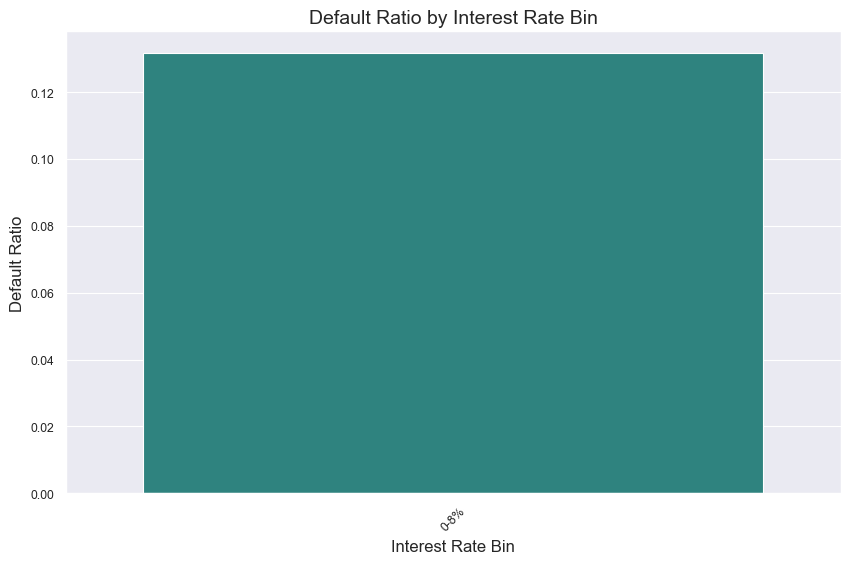

In [445]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming loan DataFrame is already defined and processed

# Group by interest rate bins and count the number of defaulted loans and total loans
dtidef = loan[loan.defaulted == 1].groupby(['int_ratet'])[['defaulted']].count().reset_index()
dtitot = loan.groupby(['int_ratet'])[['defaulted']].count().reset_index()

# Merge the counts
dtifull = pd.merge(dtidef, dtitot, left_on='int_ratet', right_on='int_ratet', how='left')
dtifull.rename(columns={"defaulted_x": "Defaulted", "defaulted_y": "Totals"}, inplace=True)

# Calculate the ratio of defaulted loans
dtifull['Ratio'] = dtifull['Defaulted'] / dtifull['Totals']

# Plot the data
plt.figure(figsize=(10,6))
sns.set_context("paper", rc={"font.size":12, "axes.titlesize":12, "axes.labelsize":12})  
sns.set_style("darkgrid")
ax = sns.barplot(x='int_ratet', y='Ratio', data=dtifull, palette='viridis')
ax.set_title('Default Ratio by Interest Rate Bin', fontsize=14)
ax.set_xlabel('Interest Rate Bin', fontsize=12)
ax.set_ylabel('Default Ratio', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

# Observation: Default ratio for loans with interest of 18% and higher is markedly high
